**At the start of each notebook there will be 3 - 5 cells of code that need to be run before the rest of the notebook. These cells make sure we have imported all the required Python packages so that we can run the rest of the code without issue!**
- If you do not have these packages, you will need to pip install them. 

In [1]:
import numpy as np # Numpy is used for math and stats in python 
import pandas as pd # Pandas is used for handling data in a spreadsheet like way
import matplotlib.pyplot as plt  # Matplotlib is used for plotting
import seaborn as sns # Seaborn is another plotting package 



In [2]:
## Matt has made a lot of improvements over the last week as we put together this workshop - run this upgrade! Then restart your kernel
#%pip install --upgrade petthermotools

In [3]:
# If the alphaMELTS for Python files have not been added to your Python path (see installation guide) then use the two lines below to add
# the location of the alphaMELTS files here.
import sys
sys.path.append(r'C:\Users\penny\Box\Berkeley_new\MELTS_Installation\alphamelts_py\alphamelts-py-2.3.1-win64')


import petthermotools as ptt 

print(ptt.__version__)

0.3.13


In [4]:
# Should be used to suppress outputs on MacOS - run twice - on windows nothing will happen
import platform
if platform.system() == "Darwin":
    import sys
    import os
    sys.stdout = open(os.devnull, 'w')
    sys.stderr = open(os.devnull, 'w')

## Lets quickly talk through datatypes
- String are letters and words like  Model = "MELTSv1.2.0" or Model = "pMELTS"
- Dataframes can be though of like an excel sheet - there are columns, with data in them. This data can be a mix of integers (like 3), floats (other numbers, like 3.0, 3.1), and strings (like Volcano Names!)
- Pandas Series are single columns of a dataframe, like one column in an excel spreadsheet
- Dictionaries are sets of data. In PetThermoTools, they are used to return multiple dataframes from a function, like a dataframe of Cpx comps, a dataframe of liquid comps, a dataframe of thermodynaical properties etc. 

# Part 1 - Using Melt Inclusion datasets to practice data handling in Python

First, we load in melt inclusion data from various arc volcanoes around the world (data taken from the supplement of Rasmussen et al. 2022).

In [5]:
# load in the excel sheet with the melt inclusion data
MI_All = pd.read_excel('MI_Arcs.xlsx', sheet_name='Data')
MI_All = MI_All.fillna(0.0)
print(type(MI_All))
MI_All.head()

<class 'pandas.core.frame.DataFrame'>


,Sample,Volcano,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,Ho,Er,Yb,Lu,Hf,Ta,W,Pb,Th,U
0,Agr07-1,Agrigan,51.33,0.98,17.13,9.254514,0.15,5.29,12.06,2.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agr07-4,Agrigan,45.45,0.65,17.27,10.191446,0.23,5.54,12.32,1.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agr07-5,Agrigan,48.17,0.72,19.25,10.307459,0.23,5.64,12.25,2.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Agr07-6,Agrigan,48.46,0.71,19.10,10.247438,0.22,5.11,13.26,2.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Agr07-7,Agrigan,50.98,0.90,17.94,9.094535,0.17,4.88,12.44,2.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lets practice extracting just one column from the dataframe

In [6]:
## Insert code to extract SiO2 content here 

### Lets practice summarizing the data available in dataframes - For example, seeing what volcanoes are present. 

In [7]:
############## Type MI_All['Volcano'].unique() below to identify what volcanoes are in the dataset ######################


### Lets practice subsampling a dataframe, so taking only data with SiO2<52 if you wanted a primitive filter

In [8]:
## Type code for filtering dataframe for SiO2 content - Discuss what an index is and how to apply it to a dataframe


In [9]:
## Type code for filtering data based on MgO and SiO2 content


We can also start to think about what data we do, or don't, want for our calculations. In this notebook we'll use the H2O (and CO2 when present) contents of the melt inclusions to assess the apparent entrapment depths (issues relating to water loss by diffusion and/or missed CO2 in the glass phase or a vapor bubble might affect these calculations). For these calculations we are only really interested in melt inclusions where H2O has been measured. Let's 'filter' our DataFrame to only include rows with H2O contents greater than 0.0.

Running the second line (**.reset_index()**) helps to ensure that the row (or index) numbers run continuously without jumps/gaps (i.e., from 0 to n).

In [10]:
H2O_Filt=MI_All['H2O_Liq'] > 0
CO2_Filt=MI_All['CO2_Liq'] > 0
MI_Filt =MI_All[H2O_Filt&CO2_Filt]

**Now have a go at isolating data from three different volcanoes of the Aleutian Arc: Augustine, Okmok, and Shishaldin. You should end up with three separate DataFrames - I have don the first calculation for you!**

In [11]:
# Let's isolate three separate dataframes for three volcanoes in the Aleutian Arc, Augustine, Okmok, and Shishaldin
Augustine = MI_Filt.loc[MI_Filt['Volcano'] == 'Augustine'].copy()
Augustine = Augustine.reset_index(drop = True)
Augustine.head()

,Sample,Volcano,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,Ho,Er,Yb,Lu,Hf,Ta,W,Pb,Th,U
0,05AUNY10oliv11mi1,Augustine,50.191883,0.725630,16.502001,10.784679,0.197794,7.459236,8.543996,1.396151,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,05AUNY10oliv1mi1,Augustine,50.729631,0.687430,15.970732,9.074930,0.141691,6.428788,8.571245,1.436735,...,0.0,1.991422,1.006121,0.0,1.792082,0.0,0.0,1.908032,1.533716,0.397616
2,05AUNY10oliv1mi2,Augustine,48.708913,0.656335,15.417113,8.933275,0.155982,6.550876,9.473506,1.712900,...,0.0,1.660746,0.905985,0.0,1.430303,0.0,0.0,1.961241,1.430352,0.460715
3,05AUNY10oliv2mi1,Augustine,48.569421,0.798501,16.000889,8.530393,0.159442,5.761033,10.247349,1.746194,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,05AUNY10oliv3mi1,Augustine,51.879647,0.756131,15.889871,8.698236,0.152119,6.110573,8.293083,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000


## Do the same for Okmok and shishaldin

In [12]:
### Try here first, then scroll down to see the answers!

##########

In [13]:
Okmok = MI_Filt.loc[MI_Filt['Volcano'] == 'Okmok'].reset_index(drop = True)
Okmok.head() 

,Sample,Volcano,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,Ho,Er,Yb,Lu,Hf,Ta,W,Pb,Th,U
0,01NYO10cpx2mi2,Okmok,49.738411,1.033843,16.399991,10.819289,0.195361,5.787326,10.757485,2.710469,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,01NYO10cpx3mi1,Okmok,55.557270,1.363999,13.326186,10.420481,0.279678,3.940522,8.042845,2.566912,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,01NYO10ol10mi1,Okmok,48.944800,0.850367,15.273566,11.016410,0.167619,7.599725,11.003493,2.459021,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,01NYO10ol11mi1,Okmok,50.230666,1.007116,14.805272,10.746232,0.144470,7.313999,10.884172,2.163723,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,01NYO10ol4mi1,Okmok,50.894494,1.063660,14.828705,12.182708,0.196190,6.061243,9.028241,2.965895,...,0.0,2.604787,2.741634,0.437791,2.746472,0.0,0.0,8.672639,1.514248,0.791225


In [14]:
Shishaldin = MI_Filt.loc[MI_Filt['Volcano'] == 'Shishaldin'].reset_index(drop = True) 
Shishaldin.head()

,Sample,Volcano,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,Ho,Er,Yb,Lu,Hf,Ta,W,Pb,Th,U
0,SH63MI06,Shishaldin,51.260569,2.738921,13.887414,12.440703,0.234933,4.778581,7.925620,2.974533,...,2.541055,6.932819,7.265117,0.820425,3.10596,0.147743,0.152746,4.499575,1.541722,0.638662
1,SH63MI18,Shishaldin,55.443123,2.433498,13.149921,12.736415,0.306739,3.379587,7.246585,3.321458,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,SH63MI30,Shishaldin,50.673657,2.277688,15.567179,12.436630,0.274340,4.446107,8.139080,3.615310,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,SH63MI42,Shishaldin,48.147774,2.019180,14.399970,14.503627,0.266464,6.399285,8.426382,2.896142,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,SH63MI48,Shishaldin,49.158847,2.183921,17.509930,12.249432,0.240710,4.826756,8.096179,3.936799,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


We can also combine DataFrames using the **pd.concat()** function. Here we can take the three DataFrames we just created for the different volcanoes and concat them into a single DataFrame called 'Aleutians'.

In [15]:
Aleutians = pd.concat([Augustine, Okmok, Shishaldin]) # make sure you use the correct variable names
Aleutians = Aleutians.reset_index(drop = True)

### Lets make a really simple plot to start with

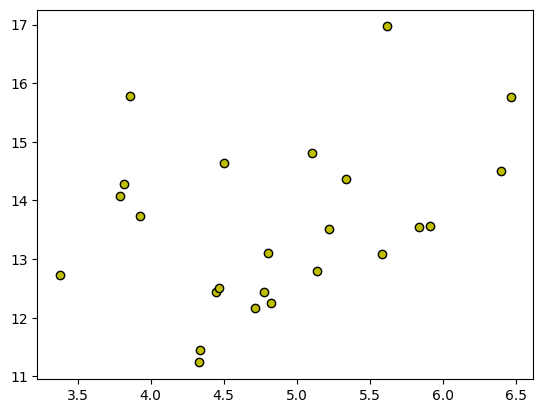

In [16]:
plt.plot(Shishaldin['MgO_Liq'], Shishaldin['FeOt_Liq'], 'ok', mfc = 'y', label = "Shishaldin")
# Lets add the x label, y label, and a legend

## Now lets make a subplot! Python is annoying, when you swap from plt.plot notation, to ax1.plot notation, things like plt.xlabel changes to ax1.set_xlabel....

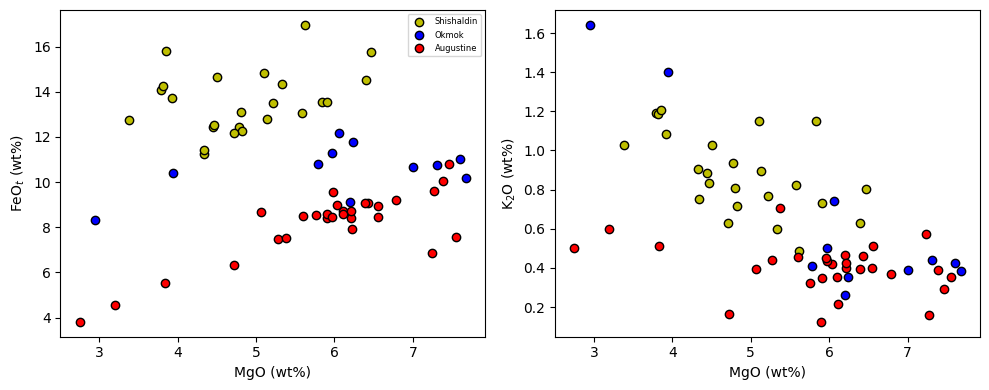

In [17]:
# Change variable names if you didn't call your DataFrames 'Shishaldin' and 'Okmok'
f, a = plt.subplots(1,2, figsize = (10, 4))
a[0].plot(Shishaldin['MgO_Liq'], Shishaldin['FeOt_Liq'], 'ok', mfc = 'y', label = "Shishaldin")
a[0].plot(Okmok['MgO_Liq'], Okmok['FeOt_Liq'], 'ok', mfc = 'b', label = "Okmok")
a[0].plot(Augustine['MgO_Liq'], Augustine['FeOt_Liq'], 'ok', mfc = 'r', label = "Augustine")

a[0].set_xlabel('MgO (wt%)')
a[0].set_ylabel('FeO$_t$ (wt%)')
a[0].legend(fontsize = 6)

############## Plot MgO vs an oxide of your choice for the melt inclusions data from the three volcanoes ###########
a[1].plot(Shishaldin['MgO_Liq'], Shishaldin['K2O_Liq'], 'ok', mfc = 'y', label = "Shishaldin")
a[1].plot(Okmok['MgO_Liq'], Okmok['K2O_Liq'], 'ok', mfc = 'b', label = "Okmok")
a[1].plot(Augustine['MgO_Liq'], Augustine['K2O_Liq'], 'ok', mfc = 'r', label = "Augustine")

a[1].set_xlabel('MgO (wt%)')
a[1].set_ylabel('K$_2$O (wt%)')
# a[1].legend(fontsize = 6)


### NOW plot the Na2O content not the K2O content
f.tight_layout()

Another useful plot for visualizing data is Violin plots. Using the seaborn package (imported earlier) we can easily create violin plots from any DataFrame. All we need to do is tell the code which column we'd like to use to separate or segment the data (here we segment the data by the different volcano names) and what variable we want to plot on the y-axis. In this case we can visualize the H2O measured in melt inclusions form each volcano:

Text(0, 0.5, 'H$_2$O (wt%)')

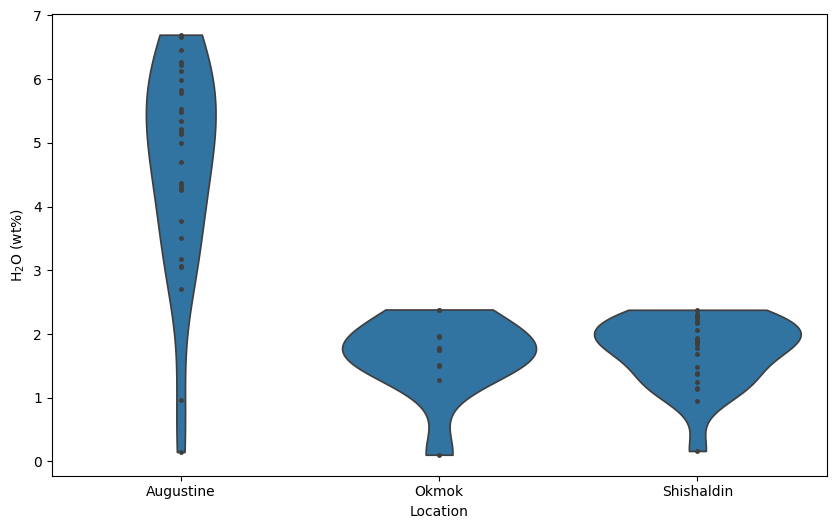

In [18]:
# Create a figure and construct violin plots for the Aleutian data.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Volcano', y='H2O_Liq', data=Aleutians, cut=0, inner = "point")

# Or another way to show this
#sns.violinplot(x='Volcano', y='H2O_Liq', data=Aleutians, cut=0, inner = "stick")

plt.xlabel('Location')
plt.ylabel('H$_2$O (wt%)')

## Can also use a Jitter plot!

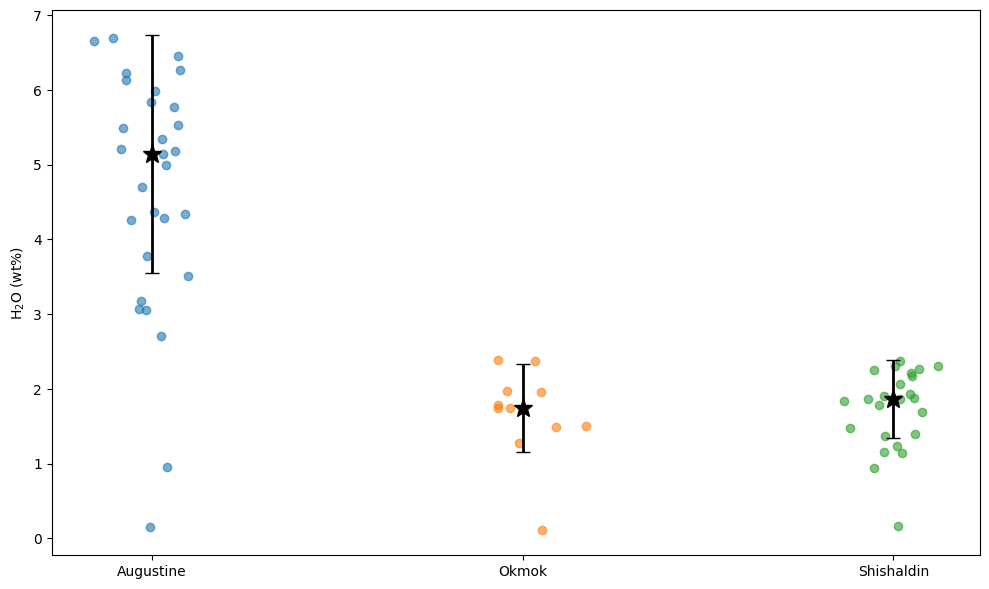

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

volcanoes = Aleutians['Volcano'].unique()

rng = np.random.default_rng(42)  # reproducible jitter

for i, volc in enumerate(volcanoes):
    y = Aleutians.loc[Aleutians['Volcano'] == volc, 'H2O_Liq'].dropna()
    # Jittered x positions
    x = rng.normal(i, 0.08, size=len(y))
    
    # Plot raw data
    plt.plot(x, y, 'o', alpha=0.6, markersize=6)
    
    # Median and 1-sigma
    med = np.nanmedian(y)
    sigma = np.nanstd(y)
    
    # Plot median star with error bars
    plt.errorbar(
        i, med,
        yerr=sigma,
        fmt='*',
        color='k',
        markersize=14,
        capsize=5,
        linewidth=2,
        zorder=10
    )

plt.xticks(range(len(volcanoes)), volcanoes)
plt.ylabel('H$_2$O (wt%)')

plt.tight_layout()


### Now visualize differences in SiO2 per volcano using whatever plot you like best!

In [20]:
# Insert code for SiO2 violin here

## Part 2 - Temperature and pressure of entrapment.

Hopefully that's given everyone a (very) quick introduction to data handling and plotting in Python! Now let's do some MELTS calculations

In this example notebook we'll use PetThermoTools to assess the storage pressure of these inclusions based on the measured H2O (and CO2) content while simultaneously solving for the liquidus temperature. The following function will iterate both pressure and temperature to simultaneously solve for both parameters. This is not supposed to replace VESIcal - its doesnt allow comparison to other solubility models. But it does allow for calculations to be done all in the same notebook. It also allows you to calculate the liquidus - although that might not be the best thing to do...

In [21]:
# Assess volatile saturation pressure and liquidus temperature of the melt inclusions.
Sat_P = ptt.saturation_pressure(Model = "MELTSv1.2.0",
                          bulk = Aleutians,
                          T_init_C= 1200,
                          P_init_bar=1000,
                          fO2_buffer="FMQ",
                          fO2_offset=2, 
                          timeout=45,
                          copy_columns=['Volcano', 'Sample']
                        )

# Talk through the copy_columns=['Sample', 'Volcano'] functionality as an alternative, so you copy things over from the original dataframe you might want. 



Completed 95.3125 %
Completed 100.0 %
Attempting to resolve 2 failed calculations (Retry 1)...


## Lets inspect the outputs from this

In [22]:
Sat_P

,Volcano,Sample,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,P_bar,T_Liq_C
0,Augustine,05AUNY10oliv11mi1,50.550194,0.727801,16.603790,10.771140,0.199206,7.499247,8.604990,1.406118,0.297196,0.280089,2.723543,0.014653,0.268463,1066.0,1193.0
1,Augustine,05AUNY10oliv1mi1,51.164799,0.691909,16.102614,9.118050,0.142907,6.479449,8.644771,1.449060,0.467042,0.195718,5.258969,0.005722,0.274748,2335.0,1182.0
2,Augustine,05AUNY10oliv1mi2,49.608604,0.667918,15.699834,9.085061,0.158864,6.670075,9.648489,1.744539,0.404856,0.134566,5.885737,0.004830,0.283292,2776.0,1186.0
3,Augustine,05AUNY10oliv2mi1,49.150267,0.806742,16.188040,8.604625,0.161349,5.826364,10.369898,1.767077,0.325184,0.190222,6.328156,0.006793,0.287273,3112.0,1183.0
4,Augustine,05AUNY10oliv3mi1,52.417606,0.762493,16.050241,8.755439,0.153696,6.170267,8.379077,0.000000,0.220010,0.138423,6.696937,0.005936,0.256266,3430.0,1176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Shishaldin,97SPS31Aol9mi1,54.360012,1.832807,11.349250,15.247883,0.273457,3.754079,6.798579,1.933122,1.179499,1.163080,1.649553,0.004257,0.267605,402.0,1225.0
60,Shishaldin,97SPS31Aoliv1mi1,49.434714,2.534056,15.505209,12.820618,0.207336,4.758128,8.026523,3.174092,0.806096,0.478104,1.836947,0.012746,0.283959,648.0,1220.0
61,Shishaldin,97SPS31Aoliv2mi1,51.123437,2.808875,12.088853,14.444680,0.268139,5.040942,7.922852,2.694269,1.142623,0.852590,1.147345,0.004988,0.286208,270.0,1214.0
62,Shishaldin,97SPS31Bol14mi1,48.550182,2.024080,14.758265,15.173316,0.158625,6.362261,7.288075,3.769362,0.798322,0.474105,0.163968,0.003400,0.281713,55.0,1224.0


As we did above we can use the **.head()** command to inspect the results. Note that the 'merge_on' kwarg means that the Sample and Volcano name will be copied across to the new DataFrame.

Text(0, 0.5, 'P_bar')

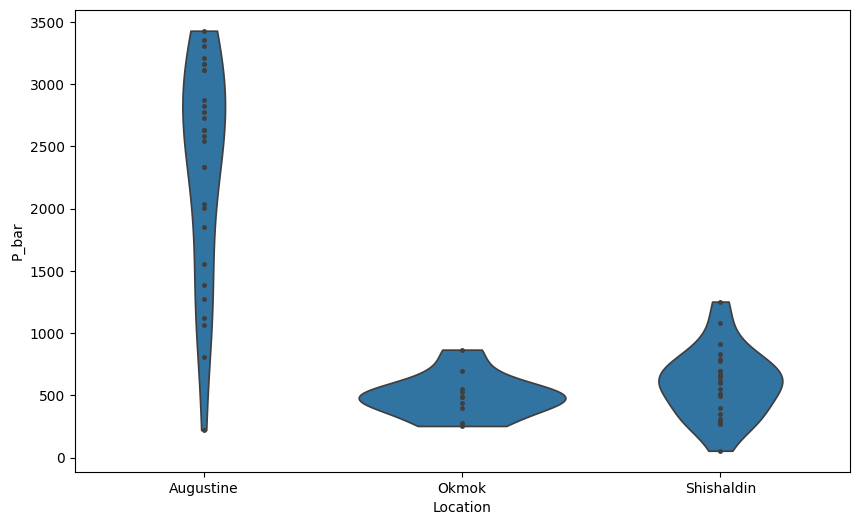

In [23]:
################ Here is a violin plot showing the estimated pressures. ##################
plt.figure(figsize=(10, 6))
sns.violinplot(x='Volcano', y='P_bar', data=Sat_P, cut=0, inner = "point")

plt.xlabel('Location')
plt.ylabel('P_bar')

In [24]:
################ Create a violin plot or Jitter plot showing the estimated temperatures. ##################



- What are the differences in pressure & temperature of storage for these different volcanoes?
- What uncertainties or errors might influence these estimates?

The difference in estimated storage pressure between arc volcanoes located above thicker crust (Augustine) and thinner crust (Okmok) led to the hypothesis that magma H2O contents control magma storage pressures (Rasmussen et al. 2022; https://doi.org/10.1126/science.abm5174).

## What about trying to make this faster if we think we have the temperature? 

In [25]:
# If you havent got it already, install Thermobar!
#!pip install Thermobar

In [26]:
import Thermobar as pt
calcT=pt.calculate_liq_only_temp(liq_comps=Aleutians, equationT='T_Put2008_eq22_BeattDMg', P=3)-273.15 # as Therombar returns in Kelvin


In [27]:
# Assess volatile saturation pressure and liquidus temperature of the melt inclusions.
Sat_P_P2008T = ptt.saturation_pressure(Model = "MELTSv1.2.0",
                          bulk = Aleutians,
                          T_fixed_C = calcT,
                          P_init_bar=1000,
                          fO2_buffer="FMQ",
                          fO2_offset=2, 
                          timeout=20
                        )

# Talk through the copy_columns=['Sample', 'Volcano'] functionality as an alternative, so you copy things over from the original dataframe you might want. 
# Lets append on the previous columns for comparison

Aleutians['P_bar_calc_LiqT']=Sat_P['P_bar']
Aleutians['T_C_calc_LiqT']=Sat_P['T_Liq_C']
## Lets add these results into our original dataframe
Aleutians['P_bar_calc_P2008T']=Sat_P_P2008T['P_bar']
Aleutians['T_C_calc_P2008T']=Sat_P_P2008T['T_Liq_C']

Completed 89.0625 %
Completed 100.0 %
Attempting to resolve 2 failed calculations (Retry 1)...


In [28]:
Sat_P_P2008T

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,P_bar,T_Liq_C
0,50.652331,0.732286,16.653387,10.883615,0.199608,7.527666,8.622376,1.408959,0.297797,0.280655,2.727422,0.013898,0.0,1012.500000,1152.078613
1,51.284417,0.694947,16.145390,9.174174,0.143241,6.499094,8.664982,1.452448,0.468133,0.196175,5.271264,0.005736,0.0,2226.562500,1085.010516
2,49.759152,0.670486,15.749530,9.125890,0.159346,6.692123,9.677770,1.749833,0.406085,0.134975,5.870968,0.003843,0.0,2566.406250,1080.483486
3,49.261119,0.809873,16.228764,8.651878,0.161713,5.843079,10.393286,1.771063,0.325918,0.190651,6.355279,0.007379,0.0,2917.968750,1050.000129
4,52.518203,0.765437,16.085450,8.805298,0.153991,6.185784,8.395157,0.000000,0.220432,0.138689,6.725183,0.006374,0.0,3269.531250,1047.099497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,54.500362,1.848361,11.387591,15.453474,0.274163,3.774735,6.816132,1.938113,1.182544,1.166083,1.654083,0.004358,0.0,380.859375,1105.394507
60,49.483863,2.558142,15.544343,13.067653,0.207542,4.790274,8.034503,3.177248,0.806897,0.478579,1.838462,0.012494,0.0,601.562500,1118.243908
61,51.183461,2.837886,12.121483,14.733244,0.268454,5.074705,7.932154,2.697432,1.143964,0.853591,1.148657,0.004970,0.0,249.023438,1146.058161
62,48.436584,2.057660,14.791605,15.663986,0.158254,6.423921,7.271022,3.760543,0.796454,0.472995,0.163584,0.003392,0.0,47.607422,1208.355903


Text(0, 0.5, 'Pressure (using Putirka, 2008)')

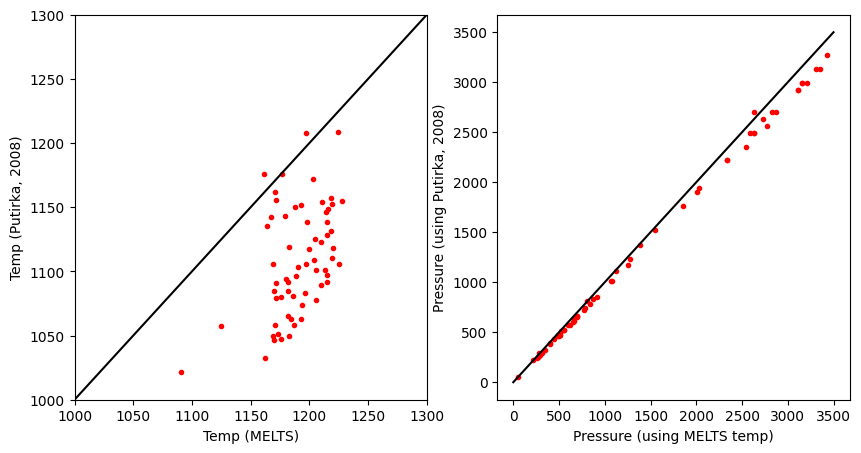

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(Aleutians['T_C_calc_LiqT'], Aleutians['T_C_calc_P2008T'], '.r')
ax1.set_xlim([1000, 1300])
ax1.set_ylim([1000, 1300])
ax1.plot([1000, 1300], [1000, 1300], '-k')
ax1.set_xlabel('Temp (MELTS)')
ax1.set_ylabel('Temp (Putirka, 2008)')


ax2.plot(Aleutians['P_bar_calc_LiqT'], Aleutians['P_bar_calc_P2008T'], '.r')
ax2.plot([0, 3500], [0, 3500], '-k')
ax2.set_xlabel('Pressure (using MELTS temp)')
ax2.set_ylabel('Pressure (using Putirka, 2008)')

# Melts tends to give higher temperatures 


### MELTS isnt the best thermometer, so often better to use an independent thermometer

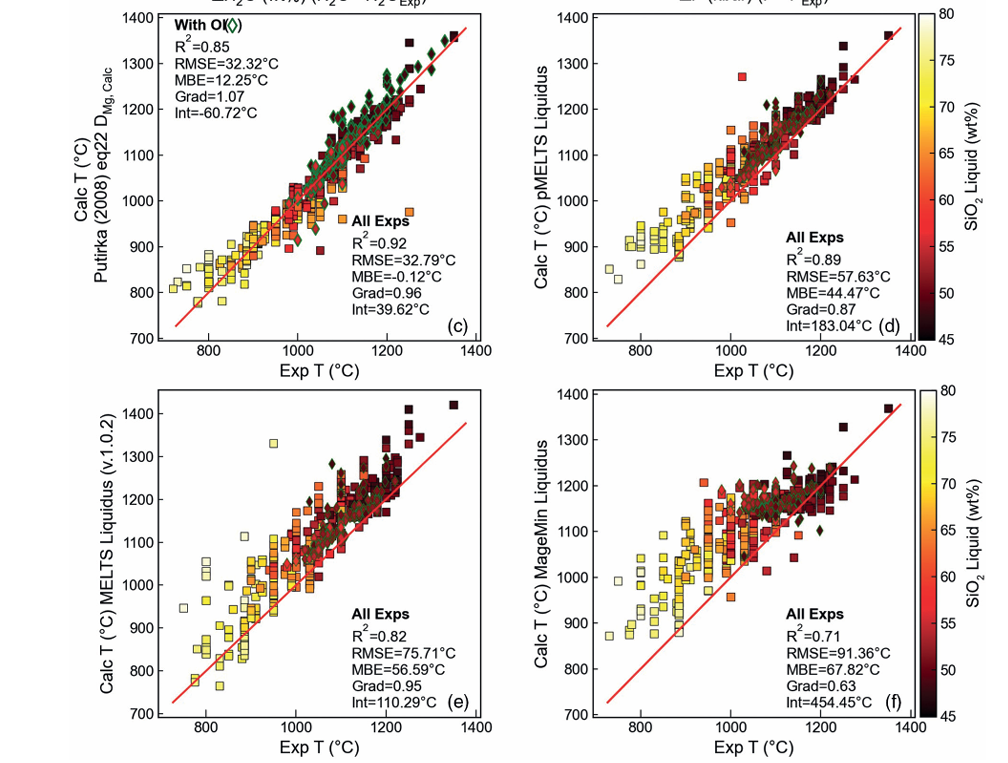

# Part 3 - Simple equilibrate calculations at a given pressure and temperature.

Another useful calculation that we can do with PetThermoTools is assess the equilibrium state of the system for any given composition and set of conditions (i.e., P, T, fO2). As an example, let's use the pressures and temperatures determined above to predict the phase stability near the liquidus for the different melt compositions.

In [30]:
############## Enter the temperature and pressure at which to perform the equilibrate calculations ################
############## The T_C and P_bar kwargs can either take a single value or an array of values the ################
############## same length as the number of compositions in the input DataFrame (Aleutians) ###############
Equil = ptt.equilibrate_multi(Model = "MELTSv1.2.0",
                              bulk = Aleutians,
                              T_C =Aleutians['T_C_calc_LiqT']-100 , # enter temperature inputs
                              P_bar =Aleutians['P_bar_calc_LiqT'], # enter pressure inputs
                              fO2_buffer = "FMQ",
                              fO2_offset = 2)

Completed 12.5 %
Completed 25.0 %
Completed 37.5 %
Completed 50.0 %
Completed 62.5 %
Completed 75.0 %
Completed 87.5 %
Completed 100.0 %


### This is our first time interacting with a dictionary so lets see what the keys are!

In [31]:
Equil.keys()

dict_keys(['spinel2_prop', 'fluid1', 'clinopyroxene1', 'olivine1_prop', 'spinel2', 'plagioclase1', 'fluid1_prop', 'spinel1_prop', 'clinopyroxene2', 'olivine1', 'clinopyroxene2_prop', 'clinopyroxene1_prop', 'orthopyroxene1', 'spinel1', 'liquid1', 'orthopyroxene1_prop', 'liquid1_prop', 'Conditions', 'plagioclase1_prop', 'All', 'PhaseList', 'mass_g', 'volume_cm3', 'rho_kg/m3'])

In [32]:
Equil['volume_cm3']

,fluid1,clinopyroxene1,spinel2,plagioclase1,clinopyroxene2,olivine1,orthopyroxene1,spinel1,liquid1
0,NaN,NaN,NaN,NaN,NaN,NaN,0.186685,2.043840,37.539232
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.596487,40.634063
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.594533,40.915375
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.485644,41.348412
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.444049,41.797940
...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.566081,36.687207
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.426396,36.603008
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789421,35.532316
62,0.119468,0.801291,NaN,7.912246,NaN,NaN,1.697801,3.461039,22.367239


In [33]:
Equil['liquid1_prop'].head()
# H is enthalpy, S is entropy, dVdT = 

,mass_g_Liq,rho_kg/m^3_Liq,V_cm^3_Liq,G_J_Liq,H_J_Liq,S_J/K_Liq,Cp_J/(kg.K^2)_Liq,dCpdT_J/(kg.K^2)_Liq,dVdT_cm^3/K_Liq,dPdT_bar/K_Liq,...,X_casio3_Liq,X_na2sio3_Liq,X_kalsio4_Liq,X_ca3(po4)2_Liq,X_co2_Liq,X_so3_Liq,X_cl2o-1_Liq,X_f2o-1_Liq,X_h2o_Liq,X_caco3_Liq
0,91.115051,2427.195375,37.539232,-1.524027e+06,-1.175836e+06,254.870321,1491.964956,0.002771,0.003444,NaN,...,0.127277,0.019588,0.005448,0.001704,0.000270,0.0,0.0,0.0,0.130532,0.000017
1,93.482150,2300.585818,40.634063,-1.582081e+06,-1.205117e+06,278.171349,1518.364284,0.003762,0.005017,NaN,...,0.114634,0.017867,0.007578,0.001054,0.000090,0.0,0.0,0.0,0.223087,0.000010
2,93.523710,2285.784013,40.915375,-1.583436e+06,-1.198280e+06,283.379657,1536.167547,0.003752,0.005474,NaN,...,0.128805,0.021429,0.006544,0.000722,0.000070,0.0,0.0,0.0,0.248728,0.000014
3,93.935258,2271.798451,41.348412,-1.592388e+06,-1.203201e+06,286.979242,1539.737518,0.003898,0.005761,NaN,...,0.135064,0.021291,0.005156,0.001001,0.000100,0.0,0.0,0.0,0.262852,0.000025
4,94.027472,2249.571903,41.797940,-1.601625e+06,-1.215706e+06,286.045979,1528.301470,0.004495,0.005824,NaN,...,0.103605,0.000000,0.003304,0.000690,0.000102,0.0,0.0,0.0,0.263989,0.000006


In [34]:
# It even returns thermodynamic properties! See what they are here. https://petthermotools.readthedocs.io/en/latest/NamingConventions.html
Equil['liquid1_prop'].columns[0:100]

Index(['mass_g_Liq', 'rho_kg/m^3_Liq', 'V_cm^3_Liq', 'G_J_Liq', 'H_J_Liq',
       'S_J/K_Liq', 'Cp_J/(kg.K^2)_Liq', 'dCpdT_J/(kg.K^2)_Liq',
       'dVdT_cm^3/K_Liq', 'dPdT_bar/K_Liq', 'd2VdT2_cm^3/K^2_Liq',
       'd2VdTdP_cm^3/(bar.K)_Liq', 'd2VdP2_cm^3/bar^2_Liq', 'molwt_Liq',
       'activity_sio2_Liq', 'activity_tio2_Liq', 'activity_al2o3_Liq',
       'activity_fe2o3_Liq', 'activity_mgcr2o4_Liq', 'activity_fe2sio4_Liq',
       'activity_mnsi0.5o2_Liq', 'activity_mg2sio4_Liq',
       'activity_nisi0.5o2_Liq', 'activity_cosi0.5o2_Liq',
       'activity_casio3_Liq', 'activity_na2sio3_Liq', 'activity_kalsio4_Liq',
       'activity_ca3(po4)2_Liq', 'activity_co2_Liq', 'activity_so3_Liq',
       'activity_cl2o-1_Liq', 'activity_f2o-1_Liq', 'activity_h2o_Liq',
       'activity_caco3_Liq', 'activity0_sio2_Liq', 'activity0_tio2_Liq',
       'activity0_al2o3_Liq', 'activity0_fe2o3_Liq', 'activity0_mgcr2o4_Liq',
       'activity0_fe2sio4_Liq', 'activity0_mnsi0.5o2_Liq',
       'activity0_mg2si

In [35]:
Equil['PhaseList'].unique()

array(['Sp,Opx,Liq', 'Sp,Liq', 'Sp,Cpx,Liq', 'Fl,Sp,Cpx,Opx,Liq,Plag',
       'Sp,Opx,Liq,Plag', 'Fl,Sp,Cpx2,Cpx,Liq,Plag', 'Sp,Liq,Plag',
       'Fl,Sp,Opx,Liq,Plag', 'Sp2,Fl,Sp,Cpx,Liq,Plag',
       'Fl,Sp,Cpx,Liq,Plag', 'Ol,Fl,Sp,Cpx,Liq,Plag', 'Fl,Sp,Liq,Plag'],
      dtype=object)

In [36]:
Equil['PhaseList']

0                 Sp,Opx,Liq
1                     Sp,Liq
2                     Sp,Liq
3                     Sp,Liq
4                     Sp,Liq
               ...          
59                    Sp,Liq
60                    Sp,Liq
61                    Sp,Liq
62    Fl,Sp,Cpx,Opx,Liq,Plag
63                    Sp,Liq
Length: 64, dtype: object

In [37]:
## Lets grab just a few lines
Small_test=Aleutians.iloc[0:3, :]
Small_test

,Sample,Volcano,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,Hf,Ta,W,Pb,Th,U,P_bar_calc_LiqT,T_C_calc_LiqT,P_bar_calc_P2008T,T_C_calc_P2008T
0,05AUNY10oliv11mi1,Augustine,50.191883,0.725630,16.502001,10.784679,0.197794,7.459236,8.543996,1.396151,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1066.0,1193.0,1012.50000,1152.078613
1,05AUNY10oliv1mi1,Augustine,50.729631,0.687430,15.970732,9.074930,0.141691,6.428788,8.571245,1.436735,...,1.792082,0.0,0.0,1.908032,1.533716,0.397616,2335.0,1182.0,2226.56250,1085.010516
2,05AUNY10oliv1mi2,Augustine,48.708913,0.656335,15.417113,8.933275,0.155982,6.550876,9.473506,1.712900,...,1.430303,0.0,0.0,1.961241,1.430352,0.460715,2776.0,1186.0,2566.40625,1080.483486


In [38]:


small_test_QFM2=ptt.equilibrate_multi(Model = "MELTSv1.2.0",
                              bulk = Small_test,
                              T_C =Small_test['T_C_calc_LiqT']-100 , # enter temperature inputs
                              P_bar =Small_test['P_bar_calc_LiqT'], # enter pressure inputs
                              fO2_buffer = "FMQ",
                              fO2_offset = 2)
small_test_QFM2['PhaseList']

Completed 100.0 %


0    Opx,Sp,Liq
1        Sp,Liq
2        Sp,Liq
dtype: object

In [39]:
small_test_QFM2['PhaseList']

0    Opx,Sp,Liq
1        Sp,Liq
2        Sp,Liq
dtype: object

In [40]:


small_test_QFMm2=ptt.equilibrate_multi(Model = "MELTSv1.2.0",
                              bulk = Small_test,
                              T_C =Small_test['T_C_calc_LiqT']-100 , # enter temperature inputs
                              P_bar =Small_test['P_bar_calc_LiqT'], # enter pressure inputs
                              fO2_buffer = "FMQ",
                              fO2_offset = -2)
small_test_QFMm2['PhaseList']

Completed 100.0 %


0    Liq,Ol
1    Liq,Ol
2       Liq
dtype: object

In [41]:


small_test_HighP=ptt.equilibrate_multi(Model = "MELTSv1.2.0",
                              bulk = Small_test,
                              T_C =Small_test['T_C_calc_LiqT']-100 , # enter temperature inputs
                              P_bar =Small_test['P_bar_calc_LiqT']*5, # enter pressure inputs
                              fO2_buffer = "FMQ",
                              fO2_offset = 2)
small_test_HighP['PhaseList']

Completed 100.0 %


0    Opx,Sp,Liq,Cpx
1    Sp,Liq,Cpx,Grt
2    Sp,Liq,Cpx,Grt
dtype: object